In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\RATNESH\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Collection And preprocessing

In [2]:
df=pd.read_csv('tested.csv')


In [3]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [4]:
df.shape


(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### check the no of missing value

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
## as the majority of data is missing from Cabin column so i am going to drop this data column
df=df.drop(columns='Cabin',axis=1)

In [8]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S


In [9]:
#for the age column i am going to replace the value with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data analysis

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,30.200103,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.562386,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
#0:-did not survived
#1:-Survived
df['Survived'].value_counts()

0    265
1    152
Name: Survived, dtype: int64

C:\Users\RATNESH\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

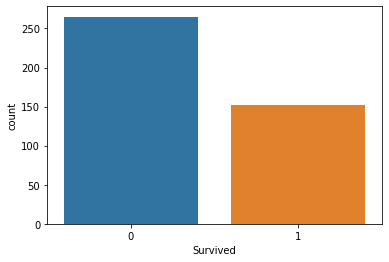

In [14]:

sns.countplot('Survived',data=df)

C:\Users\RATNESH\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

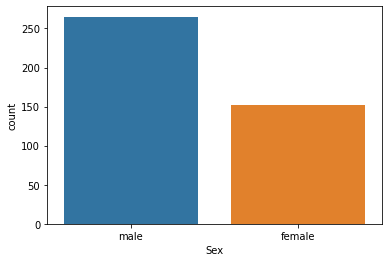

In [15]:
sns.countplot('Sex',data=df)

In [16]:
df['Sex'].value_counts()

male      265
female    152
Name: Sex, dtype: int64

C:\Users\RATNESH\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

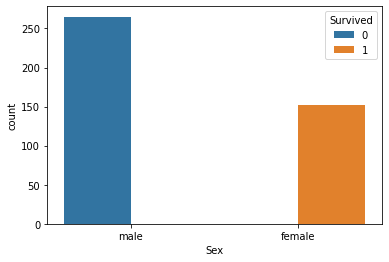

In [17]:
sns.countplot('Sex',hue ='Survived',data=df)

C:\Users\RATNESH\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

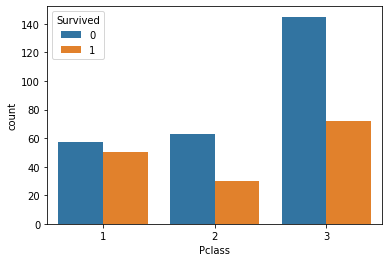

In [18]:
sns.countplot('Pclass',hue ='Survived',data=df)

In [19]:
df['Embarked'].value_counts()

S    269
C    102
Q     46
Name: Embarked, dtype: int64

In [20]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [22]:
X=df.drop(columns={'Survived','Name','Ticket'},axis=1)
Y=df['Survived']

In [23]:
print(X)

     PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0            892       3    0  34.50000      0      0    7.8292         2
1            893       3    1  47.00000      1      0    7.0000         0
2            894       2    0  62.00000      0      0    9.6875         2
3            895       3    0  27.00000      0      0    8.6625         0
4            896       3    1  22.00000      1      1   12.2875         0
..           ...     ...  ...       ...    ...    ...       ...       ...
413         1305       3    0  30.27259      0      0    8.0500         0
414         1306       1    1  39.00000      0      0  108.9000         1
415         1307       3    0  38.50000      0      0    7.2500         0
416         1308       3    0  30.27259      0      0    8.0500         0
417         1309       3    0  30.27259      1      1   22.3583         1

[417 rows x 8 columns]


In [24]:
print(Y)


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 417, dtype: int64


In [25]:
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.2 , random_state = 2)

In [26]:
#we are going to use logestic regresion as this is binnary classification
model=LogisticRegression()

In [27]:
model.fit(X_train, Y_train)

C:\Users\RATNESH\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
X_train_predict = model.predict(X_train)

In [29]:
train_accuraccy=accuracy_score(Y_train,X_train_predict)
print(train_accuraccy)

1.0


In [33]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0]


In [34]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data = ', test_data_accuracy)

Accuracy score of test data =  1.0


In [35]:
X_test_prediction = model.predict(X_test)


survival_rate = X_test_prediction.mean()

if survival_rate < 1:
    print(" You survived.")
else:
    print("failed to survive.")

 You survived.
